In [48]:
import os
import numpy as np
import colour
from colour_demosaicing import (
    EXAMPLES_RESOURCES_DIRECTORY,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)
import cv2
import math
from skimage import color

In [4]:
# CFA filters

In [5]:
img = colour.read_image("image.jpg")

C:\Users\alber\AppData\Roaming\Python\Python37\site-packages\colour\utilities\verbose.py:237: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


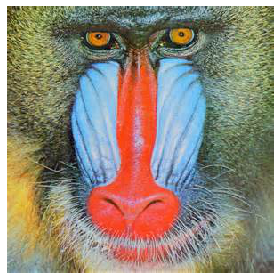

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [6]:
colour.plotting.plot_image(img)

In [7]:
imgm = mosaicing_CFA_Bayer(img)

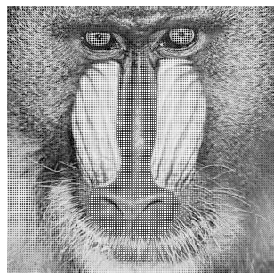

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [8]:
colour.plotting.plot_image(imgm)

In [9]:
# bilinear

In [10]:
imgdm = demosaicing_CFA_Bayer_bilinear(imgm)

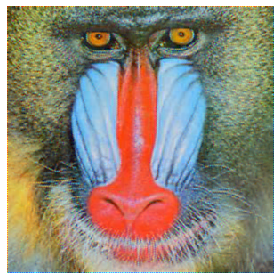

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [11]:
colour.plotting.plot_image(imgdm)

In [12]:
imgdm == img

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ..., 
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False,  True],
        [False,  True, False],
        ..., 
        [False, False,  True],
        [False,  True, False],
        [False, False, False]],

       [[False, False, False],
        [False,  True, False],
        [ True, False, False],
        ..., 
        [False,  True, False],
        [ True, False, False],
        [False, False, False]],

       ..., 
       [[False, False, False],
        [False, False,  True],
        [False,  True, False],
        ..., 
        [False,  True,  True],
        [False,  True, False],
        [False, False, False]],

       [[False, False, False],
        [False,  True,  True],
        [ True, False, False],
        ..., 
        [False,  True, False],
        [ True, False, False],
        [F

In [13]:
# Malvar2004

In [14]:
imgdm2 = demosaicing_CFA_Bayer_Malvar2004(imgm)

In [15]:
imgdm2

array([[[ 0.35686275,  0.33480393,  0.27769609],
        [ 0.30661766,  0.28235295,  0.18284315],
        [ 0.36862746,  0.36176472,  0.26617648],
        ..., 
        [ 0.42450981,  0.44313726,  0.40000001],
        [ 0.41568628,  0.43970589,  0.39240197],
        [ 0.38700981,  0.39215687,  0.37916667]],

       [[ 0.33504903,  0.32156864,  0.23504903],
        [ 0.27843137,  0.27254903,  0.11764706],
        [ 0.37475491,  0.36470589,  0.19436275],
        ..., 
        [ 0.37745099,  0.40882354,  0.3019608 ],
        [ 0.36274511,  0.43137255,  0.34607844],
        [ 0.30931374,  0.3392157 ,  0.31764707]],

       [[ 0.41176471,  0.40980393,  0.29607843],
        [ 0.37450981,  0.36470589,  0.14632353],
        [ 0.34117648,  0.31078433,  0.10490197],
        ..., 
        [ 0.36960785,  0.36470589,  0.20759805],
        [ 0.26666668,  0.29166668,  0.15955883],
        [ 0.29215688,  0.32156864,  0.24926472]],

       ..., 
       [[ 0.50735296,  0.58431375,  0.60833336],
        

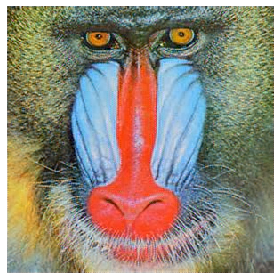

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [16]:
colour.plotting.plot_image(imgdm2)

In [17]:
imgdm2 == img

array([[[ True, False, False],
        [False,  True, False],
        [ True, False, False],
        ..., 
        [False,  True, False],
        [ True, False, False],
        [False,  True, False]],

       [[False,  True, False],
        [False, False,  True],
        [False,  True, False],
        ..., 
        [False, False,  True],
        [False,  True, False],
        [False, False,  True]],

       [[ True, False, False],
        [False,  True, False],
        [ True, False, False],
        ..., 
        [False,  True, False],
        [ True, False, False],
        [False,  True, False]],

       ..., 
       [[False,  True, False],
        [False, False,  True],
        [False,  True,  True],
        ..., 
        [False, False,  True],
        [False,  True, False],
        [False, False,  True]],

       [[ True, False, False],
        [False,  True, False],
        [ True, False, False],
        ..., 
        [False,  True, False],
        [ True, False, False],
        [F

In [18]:
# Compare the Laplacian Operator of two methods' results

In [36]:
import lap
v1 = lap.laplacian(imgdm)
v2 = lap.laplacian(imgdm2)
print(v1)
print(v2)

0.0210574442012
0.0350495050987


In [53]:
# SVD 

In [56]:
import svd
blde1 = svd.svdbd(imgdm,20)
blde2 = svd.svdbd(imgdm2,20)
print(blde1)
print(blde2)

0.607277942414
0.541164763333


In [19]:
# Multispectral Imaging

In [20]:
img2 = np.random.random(size = [6,12])

In [21]:
img2

array([[ 0.24896067,  0.6541857 ,  0.50922236,  0.25390941,  0.72447445,
         0.01866876,  0.2735019 ,  0.86317255,  0.41132129,  0.75618568,
         0.84101107,  0.86132227],
       [ 0.34872507,  0.62057399,  0.41503308,  0.32482593,  0.20966512,
         0.18982403,  0.5756238 ,  0.93832906,  0.02391681,  0.03345332,
         0.85005263,  0.36304704],
       [ 0.6842385 ,  0.09665325,  0.39100435,  0.32262531,  0.59411053,
         0.30425494,  0.01861819,  0.57666158,  0.70274012,  0.46596568,
         0.47560259,  0.25939707],
       [ 0.72517677,  0.9162226 ,  0.82562002,  0.50592901,  0.73999943,
         0.49542772,  0.55571363,  0.63683136,  0.89973475,  0.5416304 ,
         0.86593327,  0.46795248],
       [ 0.99162954,  0.19345073,  0.27240019,  0.30197196,  0.04819484,
         0.35286512,  0.43290952,  0.60091304,  0.84781493,  0.52317214,
         0.23203105,  0.59465503],
       [ 0.02888224,  0.30421567,  0.93851085,  0.75417453,  0.57112447,
         0.4823317 ,  

In [22]:
saveimg2 = img2[:] # save the values of random generated img2

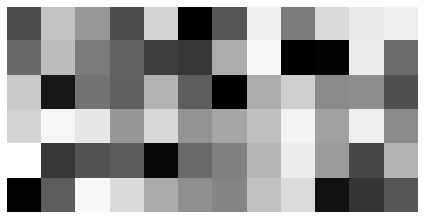

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [29]:
colour.plotting.plot_image(saveimg2)

In [30]:
shape = colour.SpectralShape(400, 700, 60)
msds = colour.MultiSpectralDistributions(saveimg2, shape.range())
XYZ = colour.msds_to_XYZ(msds, method='Integration', shape=shape)

In [31]:
msds

MultiSpectralDistributions([[  4.00000000e+02,   2.48960668e-01,   6.54185701e-01,
          5.09222360e-01,   2.53909410e-01,   7.24474451e-01,
          1.86687586e-02,   2.73501898e-01,   8.63172549e-01,
          4.11321285e-01,   7.56185683e-01,   8.41011072e-01,
          8.61322275e-01],
                            [  4.60000000e+02,   3.48725067e-01,   6.20573987e-01,
          4.15033079e-01,   3.24825926e-01,   2.09665119e-01,
          1.89824027e-01,   5.75623804e-01,   9.38329063e-01,
          2.39168085e-02,   3.34533199e-02,   8.50052628e-01,
          3.63047039e-01],
                            [  5.20000000e+02,   6.84238500e-01,   9.66532482e-02,
          3.91004351e-01,   3.22625310e-01,   5.94110532e-01,
          3.04254937e-01,   1.86181918e-02,   5.76661576e-01,
          7.02740125e-01,   4.65965679e-01,   4.75602592e-01,
          2.59397071e-01],
                            [  5.80000000e+02,   7.25176774e-01,   9.16222599e-01,
          8.25620022e-01,   5

In [26]:
# colour.plotting.plot_image(msds) 
# cannot plot

In [27]:
msds.shape

SpectralShape(400.0, 700.0, 60.0)

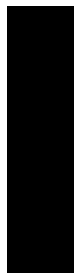

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

In [28]:
colour.plotting.plot_image(XYZ)